# RESTAURANT RANKING - A DESCRIPTIVE ANALYSIS

In this notebook, I have tried to analyse how different restaurants have performed during the year 2020. The restaurants are from two different categories - Top 250 and Future 50. Although the list of restaurants isn't exhaustive, it might give us an idea of how the different restaurants performed.

### IMPORTING IMPORTANT LIBRARIES AND THE DATA TABLES

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

In [4]:
fut50 = pd.read_csv('E:/SQL Projects/Restaurant ranking/Future50.csv')

In [5]:
top250 = pd.read_csv('E:/SQL Projects/Restaurant ranking/Top250.csv')

In [6]:
fut50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


In [7]:
top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


<h4>Changing the YOY_Sales and YOY_Units to numeric values</h4>

I just changed dropped the '%' from the YOY values from both the tables and converted the values from 'Object' to numeric.

In [8]:
fut50['YOY_Sales'] = fut50['YOY_Sales'].apply(lambda x:x.replace('%',''))
fut50['YOY_Sales']= pd.to_numeric(fut50['YOY_Sales'])
fut50['YOY_Units'] = fut50['YOY_Units'].apply(lambda x:x.replace('%',''))
fut50['YOY_Units']= pd.to_numeric(fut50['YOY_Units'])

In [9]:
top250['YOY_Sales']=top250['YOY_Sales'].apply(lambda x:x.replace('%',''))
top250['YOY_Sales']=pd.to_numeric(top250['YOY_Sales'])
top250['YOY_Units']=top250['YOY_Units'].apply(lambda x:x.replace('%',''))
top250['YOY_Units']=pd.to_numeric(top250['YOY_Units'])

In [10]:
fut50.drop(['Rank'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,50.0,33.780,9.596534,20.0,24.25,34.5,42.000,49.0
YOY_Sales,50.0,33.698,24.549205,14.4,20.90,25.5,33.825,130.5
Units,50.0,34.700,24.527577,7.0,16.00,27.0,45.500,105.0
YOY_Units,50.0,27.446,23.231051,4.0,14.30,19.9,32.675,116.7
Unit_Volume,50.0,1592.600,994.676770,465.0,867.50,1260.0,2020.000,4300.0


In [11]:
top250.drop(['Rank'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,250.0,1242.7400,3365.228820,126.0,181.000,330.0,724.750,40412.0
YOY_Sales,250.0,2.9384,8.953784,-21.2,-2.375,2.2,6.575,39.5
Units,250.0,850.0760,2296.151659,13.0,85.000,207.0,555.250,23801.0
YOY_Units,250.0,1.2192,7.936431,-32.8,-2.025,0.0,3.475,38.5


### EXPLORING THE FUTURE 50 DATA

In [12]:
fut50.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes


<h4>QUICK LOOK AT HOW THE SALES HAVE BEEN FOR EACH OF THE 50 RESTAURANTS</h4>

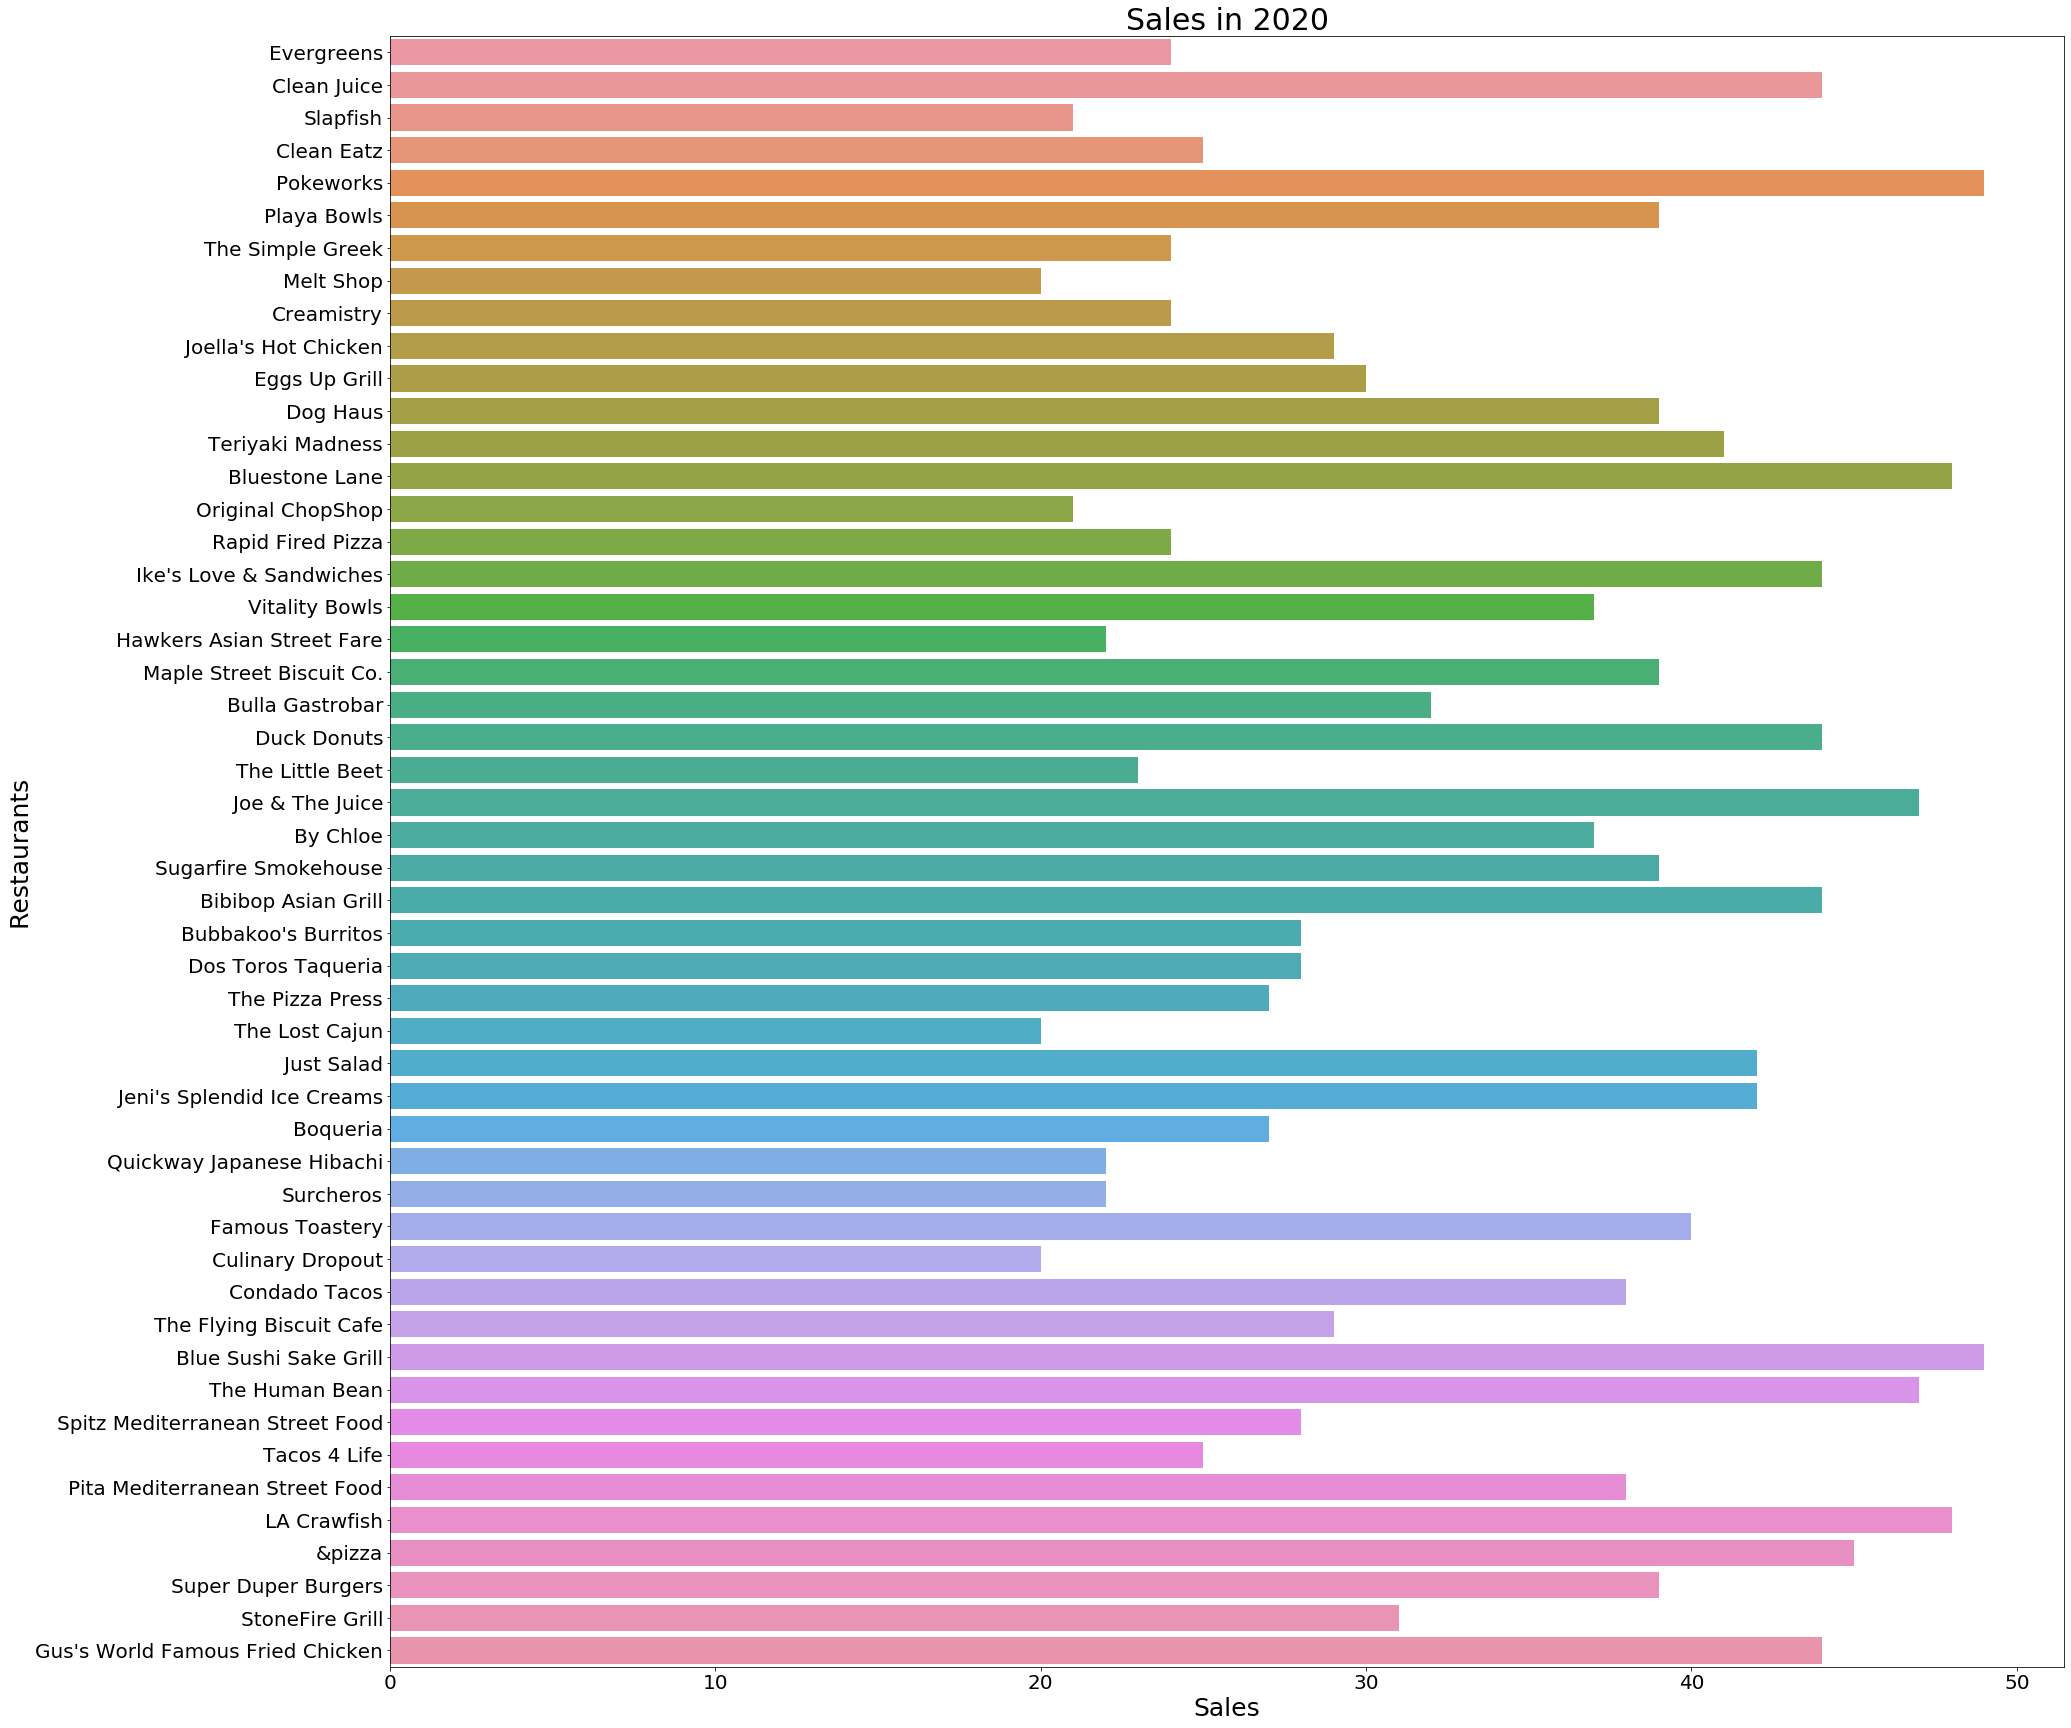

In [13]:
plt.figure(figsize=(30,30))
sns.barplot(fut50['Sales'],fut50['Restaurant'])
plt.xlabel('Sales',fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('Restaurants',fontsize=25)
plt.yticks(fontsize=20)
plt.title('Sales in 2020',fontsize=30)
plt.show()

<h5>Which restaurant(s) made the most sales in 2020</h5>

In [14]:
pysql('SELECT Restaurant,Rank,Sales FROM fut50 ORDER BY Sales DESC LIMIT 3')

,Restaurant,Rank,Sales
0,Pokeworks,5,49
1,Blue Sushi Sake Grill,41,49
2,Bluestone Lane,14,48


<h5>Which restaurant(s) made the least sales in 2020</h5>

In [15]:
pysql('SELECT Restaurant,Rank,Sales FROM fut50 ORDER BY Sales ASC LIMIT 4')

,Restaurant,Rank,Sales
0,Melt Shop,8,20
1,The Lost Cajun,31,20
2,Culinary Dropout,38,20
3,Slapfish,3,21


<h4>Adding an extra column</h4>

I added an extra column to the fut50 table called 'Region' which consists of states where each of the restaurants belong, in order to simplify further investigations

In [16]:
from itertools import chain
j=[]
region=[]
m=[]
l=0
for i in fut50['Location']:
    a=i.split(', ')
    j.append(a)

j=list(chain.from_iterable(j))

for i in j:
    l+=1
    if l%2==0:
        region.append(i)
    else:
        m.append(i)

fut50['Region']=region
fut50.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,Region
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No,Wash.
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes,N.C.
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes,Calif.
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes,N.C.
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes,Calif.


There are some typos in the Region names, they have extra spaces in front, which I will remove in the following code.

In [17]:
fut50['Region']= fut50['Region'].str.replace(' Calif.','Calif.')
fut50['Region']= fut50['Region'].str.replace(' N.J.','N.J.')

A look at the region-wise comparison of Sales and YOY_Sales 

In [18]:
pysql('SELECT Region,SUM(Sales) AS Total_Sale,AVG(YOY_Sales) AS YOY_Sales FROM fut50 GROUP BY Region ORDER BY Total_Sale DESC')

,Region,Total_Sale,YOY_Sales
0,Calif.,339,36.570000
1,N.Y.,272,27.412500
2,Ohio,148,24.775000
3,N.C.,109,74.266667
4,Fla.,93,29.033333
5,Texas,89,24.366667
6,Ga.,89,19.533333
7,Pa.,68,40.250000
8,N.J.,67,43.600000
9,Neb.,49,19.500000


A broader look comparing different restaurants grouped according to the region they belong to

In [19]:
fut50.groupby(['Region','Restaurant']).sum()

Rank  Sales  YOY_Sales  Units  \
Region Restaurant                                                        
Ariz.  Culinary Dropout                    38     20       20.8      7   
Ark.   Tacos 4 Life                        44     25       18.4     16   
Calif. Creamistry                           9     24       36.8     60   
       Dog Haus                            12     39       34.5     50   
       Ike's Love & Sandwiches             17     44       30.8     71   
       Pokeworks                            5     49       77.1     50   
       Slapfish                             3     21       81.0     21   
       Spitz Mediterranean Street Food     43     28       18.8     11   
       StoneFire Grill                     49     31       16.0     13   
       Super Duper Burgers                 48     39       16.9     16   
       The Pizza Press                     30     27       23.7     27   
       Vitality Bowls                      18     37       30.1     77   
Colo.  Teriyaki Madness                    13     41       34.1     63   
D.C.   &pizza                              47     45       17.1     35   
Fla.   Bulla Gastrobar                     21     32       28.2      8   
       Hawkers Asian Street Fare           19     22       30.0      7   
       Maple Street Biscuit Co.            20     39       28.9     33   
Ga.    Pita Mediterranean Street Food      45     38       17.8     32   
       Surcheros                           36     22       21.3     20   
       The Flying Biscuit Cafe             40     29       19.5     21   
Ky.    Joella's Hot Chicken                10     29       35.5     17   
Mo.    Sugarfire Smokehouse                26     39       25.4     15   
N.C.   Clean Eatz                           4     25       79.7     46   
       Clean Juice                          2     44      121.9    105   
       Famous Toastery                     37     40       21.2     27   
N.J.   Bubbakoo's Burritos                 28     28       24.3     31   
       Playa Bowls                          6     39       62.9     76   
N.Y.   Bluestone Lane                      14     48       33.0     48   
       Boqueria                            34     27       22.0      7   
       By Chloe                            25     37       25.6     14   
       Dos Toros Taqueria                  29     28       24.0     22   
       Joe & The Juice                     24     47       25.9     69   
       Just Salad                          32     42       22.7     38   
       Melt Shop                            8     20       39.6     19   
       The Little Beet                     23     23       26.5     12   
Neb.   Blue Sushi Sake Grill               41     49       19.5     14   
Ohio   Bibibop Asian Grill                 27     44       24.6     37   
       Condado Tacos                       39     38       19.9     15   
       Jeni's Splendid Ice Creams          33     42       22.4     44   
       Rapid Fired Pizza                   16     24       32.2     35   
Ore.   The Human Bean                      42     47       19.0     97   
Pa.    Duck Donuts                         22     44       28.0     90   
       The Simple Greek                     7     24       52.5     36   
S.C.   Eggs Up Grill                       11     30       35.4     41   
Tenn.  Gus's World Famous Fried Chicken    50     44       14.4     28   
Texas  LA Crawfish                         46     48       17.6     25   
       Original ChopShop                   15     21       32.5     12   
       The Lost Cajun                      31     20       23.0     26   
Va.    Quickway Japanese Hibachi           35     22       21.4     25   
Wash.  Evergreens                           1     24      130.5     26   

                                         YOY_Units  Unit_Volume  
Region Restaurant                                                
Ariz.  Culinary Dropout                       16.7         3

The sale numbers for California probably owes to the greater number of restaurants compared to other states

<h4>How many in Future 50 are franchise restaurants</h4>

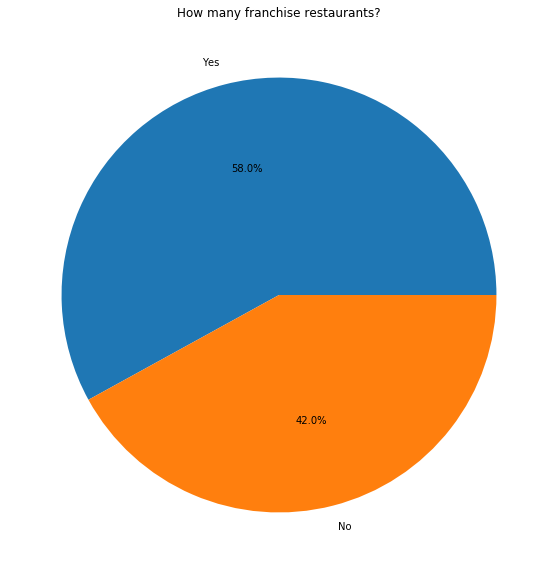

In [20]:
l=0
m=0
franchise=[]
for franch in fut50['Franchising']:
    if franch=='Yes':
        l+=1
    else:
        m+=1
franchise.append(l)
franchise.append(m)
y=np.array(franchise)
ylabels=['Yes','No']

plt.figure(figsize=(10,10))
plt.pie(y,labels=ylabels,autopct='%1.1f%%')
plt.title('How many franchise restaurants?')
plt.show()

In [21]:
pysql('SELECT Franchising,SUM(Sales) AS Sales, AVG(Sales) AS Avg_Sales,AVG(YOY_Sales) AS YOY_Sales,SUM(Units) AS Units,AVG(Units) AS Avg_Units, AVG(YOY_Units) AS YOY_Units FROM fut50 GROUP BY Franchising')

,Franchising,Sales,Avg_Sales,YOY_Sales,Units,Avg_Units,YOY_Units
0,No,708,33.714286,29.138095,418,19.904762,24.047619
1,Yes,981,33.827586,37.000000,1317,45.413793,29.906897


The franchise restaurants seem to have done better in every aspect.

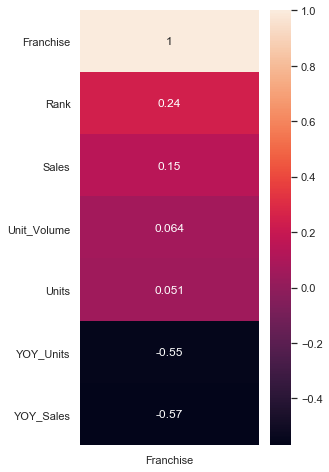

In [22]:
a=0
franchise=[]
for f in fut50['Franchising']:
    if f=='Yes':
        a=1
        franchise.append(a)
    else:
        franchise.append(a)
        
fut50['Franchise']=franchise
corr=fut50.corr().loc[:,['Franchise']]
plt.figure(figsize=(4,8))
sns.set(style="whitegrid")
sns.heatmap(corr.sort_values(by=['Franchise'],ascending=False),annot=True)
x = plt.gca().xaxis
plt.show()

### EXPLORING THE TOP 250 RESTAURANTS DATA

In [23]:
top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9,13846,-0.5,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6,15049,3.0,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0,2470,5.0,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0,6766,2.7,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7,7346,0.2,NaN,Quick Service & Burger


How many top restaurants saw decrease in sales in the year 2020

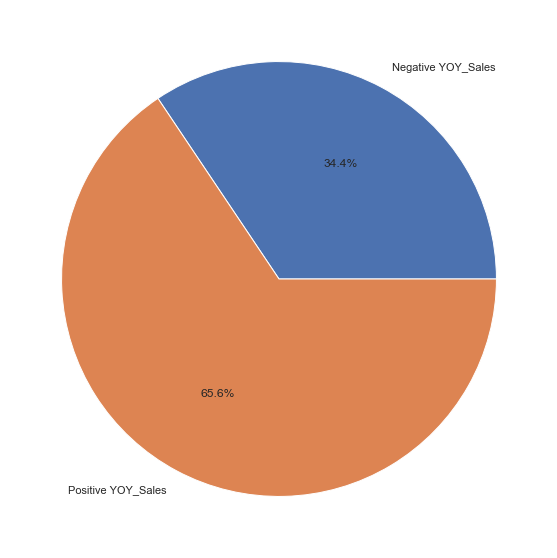

In [24]:
j=0
k=0
l=[]
for i in top250['YOY_Sales']:
    if i<0:
        j+=1
    else:
        k+=1
        
l.append(j)
l.append(k)

y=np.array(l)
ylabels = ['Negative YOY_Sales','Positive YOY_Sales']

plt.figure(figsize=(10,10))
plt.pie(y,labels=ylabels,autopct='%1.1f%%')
plt.show()

Even during Covid, majority of restaurants made positive YOY Sales.

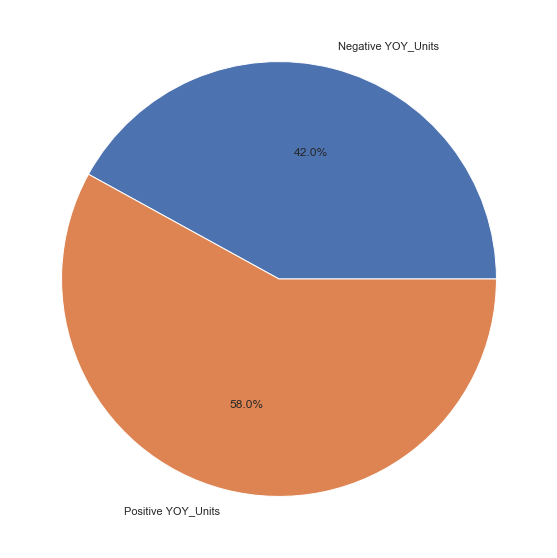

In [25]:
j=0
k=0
l=[]
for i in top250['YOY_Units']:
    if i<0:
        j+=1
    else:
        k+=1
        
l.append(j)
l.append(k)

y=np.array(l)
ylabels = ['Negative YOY_Units','Positive YOY_Units']

plt.figure(figsize=(10,10))
plt.pie(y,labels=ylabels,autopct='%1.1f%%')
plt.show()

In [26]:
pysql('SELECT Restaurant,YOY_Sales,Segment_Category FROM top250 ORDER BY YOY_Sales ASC LIMIT 10')

,Restaurant,YOY_Sales,Segment_Category
0,Houlihan's,-21.2,Varied Menu
1,Old Country Buffet/HomeTown Buffet,-18.8,Family Casual
2,Fuddruckers,-15.8,Burger
3,McCormick & Schmick's,-15.6,Seafood
4,Friendly's,-15.3,Family Style
5,Uno Pizzeria & Grill,-12.9,Italian/Pizza
6,Pei Wei Asian Diner,-12.5,Asian/Noodle
7,Taco Bueno,-12.4,Mexican
8,Ruby Tuesday,-11.4,Casual Dining & Varied Menu
9,Rainforest Cafe,-10.4,Varied Menu


In [27]:
pysql('SELECT Restaurant,YOY_Units,Segment_Category FROM top250 ORDER BY YOY_Units ASC LIMIT 10')

,Restaurant,YOY_Units,Segment_Category
0,Houlihan's,-32.8,Varied Menu
1,Old Country Buffet/HomeTown Buffet,-24.6,Family Casual
2,Friendly's,-20.4,Family Style
3,Pei Wei Asian Diner,-16.7,Asian/Noodle
4,McCormick & Schmick's,-14.6,Seafood
5,Boston Market,-14.1,Fast Casual & Chicken
6,Uno Pizzeria & Grill,-14.1,Italian/Pizza
7,Perkins Restaurant & Bakery,-13.0,Family Dining & Family Style
8,Taco Bueno,-12.1,Mexican
9,Fuddruckers,-11.5,Burger


In [28]:
pysql('SELECT Restaurant,YOY_Sales,Segment_Category FROM top250 ORDER BY YOY_Sales DESC LIMIT 10')

,Restaurant,YOY_Sales,Segment_Category
0,Chicken Salad Chick,39.5,Chicken
1,Metro Diner,36.3,Family Style
2,First Watch,35.1,Family Dining & Family Style
3,Shake Shack,31.8,Fast Casual & Burger
4,Walk-On's Sports Bistreaux,27.8,Sports Bar
5,Mission BBQ,25.0,BBQ
6,Raising Cane's Chicken Fingers,23.8,Fast Casual & Chicken
7,MOD Pizza,23.8,Fast Casual & Pizza
8,Tropical Smoothie Cafe,21.8,Quick Service & Beverage
9,Lazy Dog Restaurant & Bar,21.3,Varied Menu


In [29]:
pysql('SELECT Restaurant,YOY_Units,Segment_Category FROM top250 ORDER BY YOY_Units DESC LIMIT 10')

,Restaurant,YOY_Units,Segment_Category
0,Chicken Salad Chick,38.5,Chicken
1,Walk-On's Sports Bistreaux,37.5,Sports Bar
2,True Food Kitchen,28.0,Varied Menu
3,Shake Shack,27.2,Fast Casual & Burger
4,First Watch,24.7,Family Dining & Family Style
5,Mission BBQ,21.6,BBQ
6,Lazy Dog Restaurant & Bar,20.0,Varied Menu
7,MOD Pizza,18.2,Fast Casual & Pizza
8,Cooper's Hawk Winery & Restaurants,17.1,Varied Menu
9,Tropical Smoothie Cafe,16.0,Quick Service & Beverage


In [30]:
pysql('SELECT Restaurant,Rank,Sales/Units AS Sales_per_Unit FROM top250 ORDER BY Sales_per_Unit DESC LIMIT 10')

,Restaurant,Rank,Sales_per_Unit
0,Mastro's Restaurants,155,13
1,Del Frisco's Double Eagle Steak House,169,12
2,Grand Lux Cafe,213,12
3,The Cheesecake Factory,33,10
4,Ocean Prime,227,9
5,Portillo's,89,8
6,Cooper's Hawk Winery & Restaurants,120,8
7,Nobu,233,8
8,Yard House,74,7
9,The Capital Grille,96,7


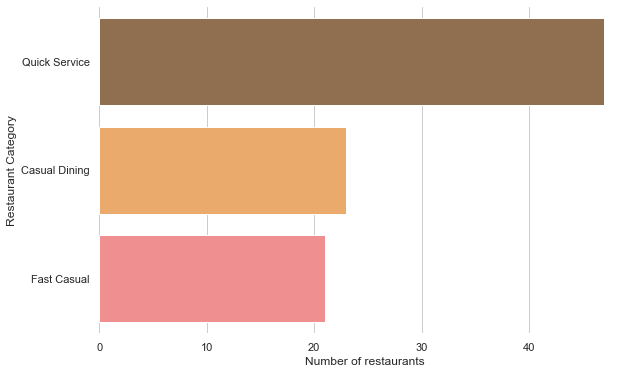

<Figure size 432x288 with 0 Axes>

In [31]:
from itertools import chain 
k=0
l=0
sub_cat=[]
for cat in top250['Segment_Category']:
    cats=cat.split(' & ')
    sub_cat.append(cats)

sub_cat=list(chain.from_iterable(sub_cat))

category=[]
sub_category=[]
for a in sub_cat:
    if a=='Quick Service' or a=='Casual Dining' or a=='Fast Casual':
        category.append(a)
    else:
        sub_category.append(a)

dff=pd.DataFrame(category)
dff=dff[0].value_counts()
dff = dff[:20, ]
plt.figure(figsize = (9.5, 6))
ax=sns.barplot(dff.values, dff.index, alpha = 1,palette=("spring_d"))
plt.ylabel("Restaurant Category")
plt.xlabel("Number of restaurants")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
plt.subplots_adjust(left=0.27)

As expected, Quick Services have done better than Casual dining and Fast Casuals during the pandemic.

<h4>A Quick Comparison Between Different Sub-Categories According to the Sales They Made</h4>

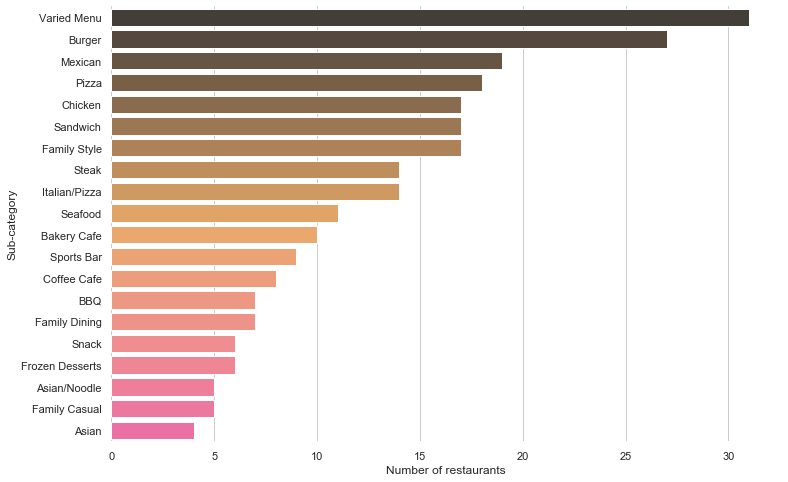

<Figure size 432x288 with 0 Axes>

In [32]:
dff=pd.DataFrame(sub_category)
dff=dff[0].value_counts()
dff = dff[:20, ]
plt.figure(figsize = (12, 8))
ax=sns.barplot(dff.values, dff.index, alpha = 1,palette=("spring_d"))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylabel("Sub-category")
plt.xlabel("Number of restaurants")
plt.show()
plt.subplots_adjust(left=0.27)

<h5>In the following code, I have separated 'Segment_Category' into two parts (separated into two columns and added them to the top250 table) - 'Category' and 'Sub_Category' for further investigation</h5>

In [33]:
import re
j=0
k=1
Category=[]
Sub_Category=[]
for i in top250['Segment_Category']:
    pattern1 = re.compile(r'Quick Service.*')
    pattern2 = re.compile(r'Fast Casual.*')
    pattern3 = re.compile(r'Casual Dining.*')
    pattern4 = re.compile(r'Family Dining.*')
    pattern5 = re.compile(r'Fine Dining.*')
    if pattern1.match(i):
        Category.append('Quick Service')
        cat=i.replace('Quick Service & ','')
        Sub_Category.append(cat)
    elif pattern2.match(i):
        Category.append('Fast Casual')
        cat=i.replace('Fast Casual & ','')
        Sub_Category.append(cat)
    elif pattern3.match(i):
        Category.append('Casual Dining')
        cat=i.replace('Casual Dining & ','')
        Sub_Category.append(cat)
    elif pattern4.match(i):
        Category.append('Family Dining')
        cat=i.replace('Family Dining & ','')
        Sub_Category.append(cat)
    elif pattern5.match(i):
        Category.append('Fine Dining')
        cat=i.replace('Fine Dining & ','')
        Sub_Category.append(cat)
    else:
        Category.append('')
        Sub_Category.append(i)

top250['Category']=Category
top250['Sub_Category']=Sub_Category

In [34]:
top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category,Category,Sub_Category
0,1,McDonald's,NaN,40412,4.9,13846,-0.5,NaN,Quick Service & Burger,Quick Service,Burger
1,2,Starbucks,NaN,21380,8.6,15049,3.0,NaN,Quick Service & Coffee Cafe,Quick Service,Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0,2470,5.0,NaN,Quick Service & Chicken,Quick Service,Chicken
3,4,Taco Bell,NaN,11293,9.0,6766,2.7,NaN,Quick Service & Mexican,Quick Service,Mexican
4,5,Burger King,NaN,10204,2.7,7346,0.2,NaN,Quick Service & Burger,Quick Service,Burger


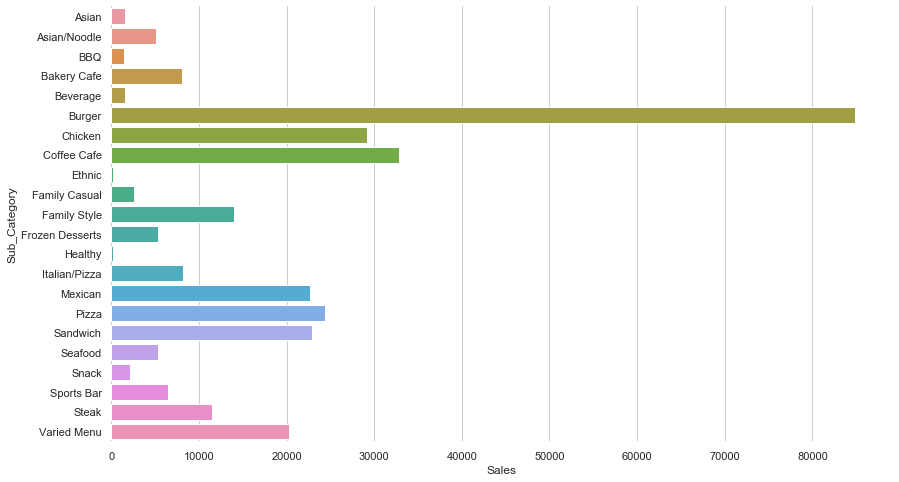

In [35]:
x=top250['Sales'].groupby(top250['Sub_Category']).sum()
plt.figure(figsize=(14,8))
ax=sns.barplot(x,x.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Burger-themed restaurants seemed to have done amazingly well during the pandemic. While restaurants serving "Healthy" and ethnic food did worst.

In [36]:
k=0
sales_per_unit=[]
for i in top250['Restaurant']:
    spu=top250['Sales'][k]/top250['Units'][k]
    sales_per_unit.append(spu)
    k+=1
    
top250['Sales_per_Unit']=sales_per_unit

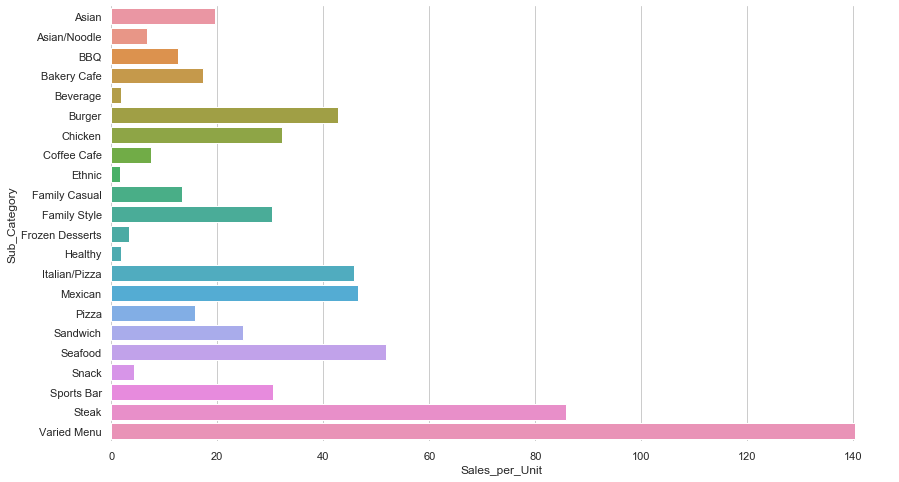

In [37]:
x=top250['Sales_per_Unit'].groupby(top250['Sub_Category']).sum()
plt.figure(figsize=(14,8))
ax=sns.barplot(x,x.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

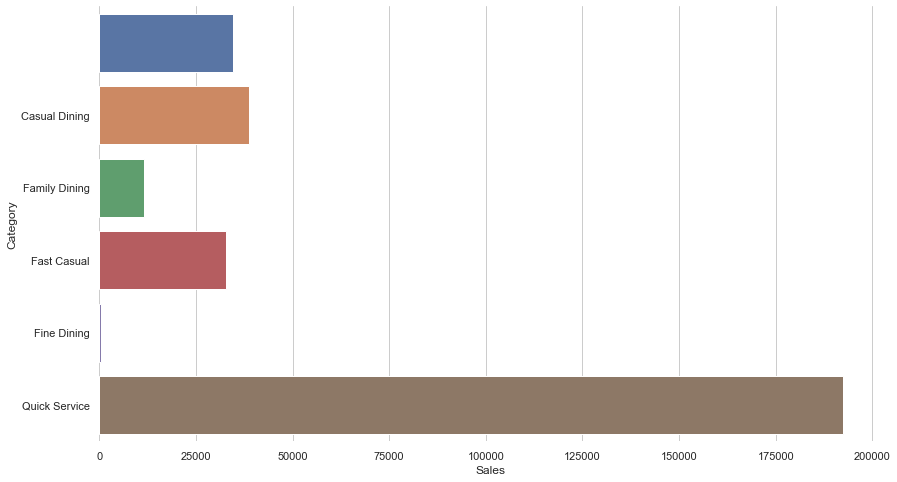

In [38]:
x=top250['Sales'].groupby(top250['Category']).sum()
plt.figure(figsize=(14,8))
ax=sns.barplot(x,x.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

As expected, and just like Future 50, Quick Services restaurants have done much better than the rest category.
<i>Note: The column with no label reperesents restaurants whose category aren't mentioned in the data</i>

In [39]:
pysql('SELECT Restaurant, Sales*100/(SELECT SUM(Sales) FROM top250) AS Sales_Percentage FROM top250 LIMIT 10')

,Restaurant,Sales_Percentage
0,McDonald's,13
1,Starbucks,6
2,Chick-fil-A,3
3,Taco Bell,3
4,Burger King,3
5,Subway,3
6,Wendy's,3
7,Dunkin',2
8,Domino's,2
9,Panera Bread,1


<b>13%</b> of all the sales dony by the Top 250 restaurants is done by <b>McDonald's</b> alone. It is followed by <b>Starbucks</b> with <b>6%</b> of total sales.

Next, we will look at the top 10 restaurants who were able to increase their sales (as compared to year 2019) the most, in 2020.

In [40]:
pysql('SELECT Restaurant, YOY_Sales, Segment_Category FROM top250 ORDER BY YOY_Sales DESC LIMIT 10')

,Restaurant,YOY_Sales,Segment_Category
0,Chicken Salad Chick,39.5,Chicken
1,Metro Diner,36.3,Family Style
2,First Watch,35.1,Family Dining & Family Style
3,Shake Shack,31.8,Fast Casual & Burger
4,Walk-On's Sports Bistreaux,27.8,Sports Bar
5,Mission BBQ,25.0,BBQ
6,Raising Cane's Chicken Fingers,23.8,Fast Casual & Chicken
7,MOD Pizza,23.8,Fast Casual & Pizza
8,Tropical Smoothie Cafe,21.8,Quick Service & Beverage
9,Lazy Dog Restaurant & Bar,21.3,Varied Menu


<h5>A quick look at correlation between different features for Top 250 Restaurants</h5> 

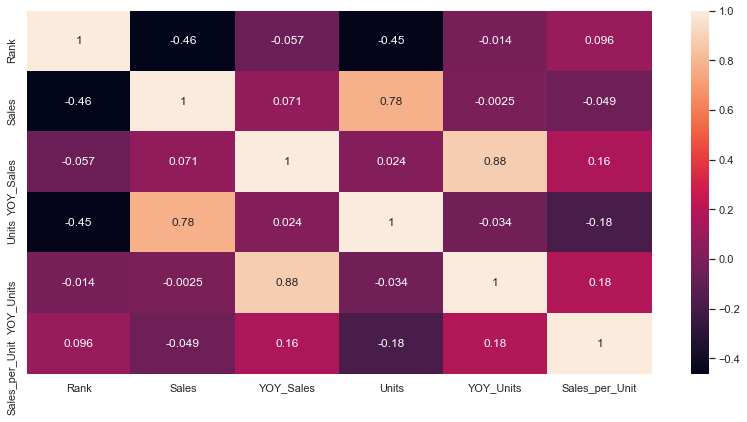

In [41]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid")
corr = top250.corr()
sns.heatmap(corr,annot=True)

x = plt.gca().xaxis

plt.subplots_adjust(bottom=0.25)

There seems to be strong correlation between Units & Sales and YOY_Units & YOY_Sales.